<a href="https://colab.research.google.com/github/EshaRana17/Conjunctivitis/blob/main/Multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

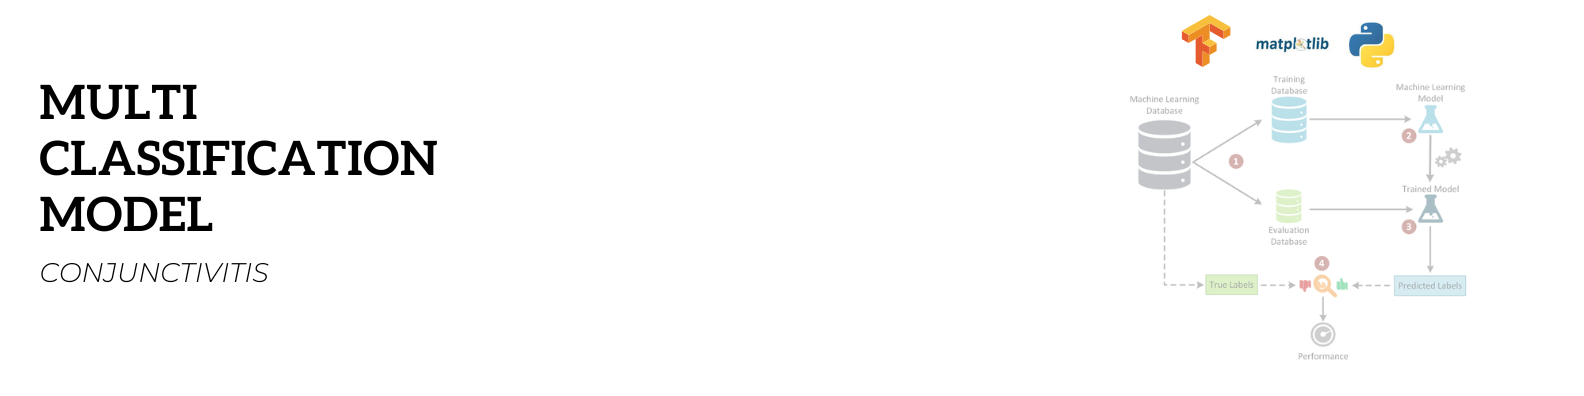

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Define the path to your requirements.txt file
requirement_path = '/content/drive/MyDrive/requirement.txt'

# Step 3: Install dependencies from requirements.txt
!pip install -r "{requirement_path}"

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg

# **Data Preparation**
**1. Exploratory Data Analysis (EDA)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/multidataset'
classes = os.listdir(dataset_path)

print("Classes found:", classes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classes found: ['allergic conjunctivitis', 'Uveitis', 'bacterial conjuntivities', 'healthy eye', 'viral conjuntivities']


In [ ]:
class_counts = {}

for cls in classes:
    class_folder = os.path.join(dataset_path, cls)
    if os.path.isdir(class_folder):
        class_counts[cls] = len(os.listdir(class_folder))

print("Image count per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

Image count per class:
allergic conjunctivitis: 130
Uveitis: 150
bacterial conjuntivities: 150
healthy eye: 209
viral conjuntivities: 130


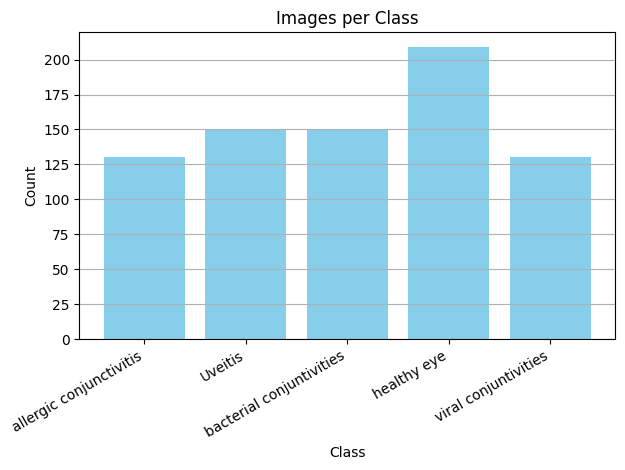

In [ ]:
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


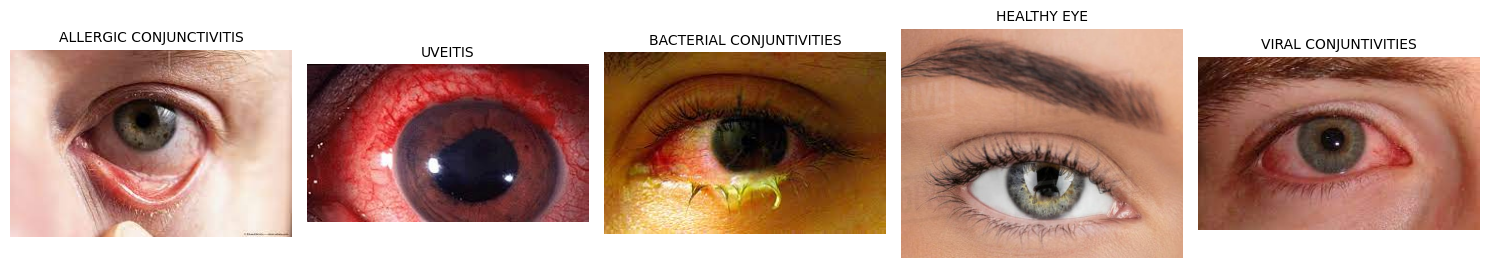

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Assuming 'classes' and 'dataset_path' are already defined
img_paths = []
titles = []

for cls in classes:
    img_dir = os.path.join(dataset_path, cls)
    img_files = sorted(os.listdir(img_dir))[:1]
    if img_files:
        img_paths.append(os.path.join(img_dir, img_files[0]))
        titles.append(cls.upper())

# Plot all images in one row
plt.figure(figsize=(15, 4))
for i, (path, title) in enumerate(zip(img_paths, titles)):
    img = Image.open(path)
    plt.subplot(1, len(img_paths), i + 1)
    plt.imshow(img)
    plt.title(title, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
shapes = []

for cls in classes:
    img_name = os.listdir(os.path.join(dataset_path, cls))[0]
    img = Image.open(os.path.join(dataset_path, cls, img_name))
    shapes.append(np.array(img).shape)

for cls, shape in zip(classes, shapes):
    print(f"{cls}: {shape}")


allergic conjunctivitis: (194, 259, 3)
Uveitis: (165, 306, 3)
bacterial conjuntivities: (170, 296, 3)
healthy eye: (139, 139)
viral conjuntivities: (176, 286, 3)


In [ ]:
resized_images = []
labels = []
new_size = (224, 224)

for cls in classes:
    for img_name in os.listdir(f"{dataset_path}/{cls}"):
        img = Image.open(f"{dataset_path}/{cls}/{img_name}").convert("RGB")
        img = img.resize(new_size)
        resized_images.append(np.array(img))
        labels.append(cls)

In [ ]:
for cls in classes:
    sizes = [img.shape for img, label in zip(resized_images, labels) if label == cls]
    print(f"{cls}: {len(sizes)} images, All size: {sizes[0]}")

allergic conjunctivitis: 130 images, All size: (224, 224, 3)
Uveitis: 150 images, All size: (224, 224, 3)
bacterial conjuntivities: 150 images, All size: (224, 224, 3)
healthy eye: 209 images, All size: (224, 224, 3)
viral conjuntivities: 130 images, All size: (224, 224, 3)


# **2. Dataset Spliting**

In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(resized_images)
Y = np.array(labels)

# Train / Val / Test Split (70/20/10)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=1/3, random_state=42)

# Shape summary
print("Train:", X_train.shape, Y_train.shape)
print("Val:  ", X_val.shape, Y_val.shape)
print("Test: ", X_test.shape, Y_test.shape)

Train: (538, 224, 224, 3) (538,)
Val:   (154, 224, 224, 3) (154,)
Test:  (77, 224, 224, 3) (77,)


# **3. Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Step 1: Encode string labels to integers
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)

# Step 2: Convert integer labels to one-hot encoded vectors
num_classes = len(label_encoder.classes_)
Y_train_one_hot = to_categorical(Y_train_encoded, num_classes=num_classes)
Y_val_one_hot = to_categorical(Y_val_encoded, num_classes=num_classes)
Y_test_one_hot = to_categorical(Y_test_encoded, num_classes=num_classes)

# Step 3: Convert image lists to NumPy arrays
X_train_array = np.array(X_train)
X_val_array = np.array(X_val)
X_test_array = np.array(X_test)

# Step 4: Print shapes and encoded labels for verification
print("Training set shapes:", X_train_array.shape, Y_train_one_hot.shape)
print("Validation set shapes:", X_val_array.shape, Y_val_one_hot.shape)
print("Testing set shapes:", X_test_array.shape, Y_test_one_hot.shape)

print("Encoded labels for training set:", Y_train_encoded)
print("Encoded labels for validation set:", Y_val_encoded)
print("Encoded labels for testing set:", Y_test_encoded)


Training set shapes: (538, 224, 224, 3) (538, 5)
Validation set shapes: (154, 224, 224, 3) (154, 5)
Testing set shapes: (77, 224, 224, 3) (77, 5)
Encoded labels for training set: [2 0 3 3 1 3 0 2 0 3 1 1 3 4 1 2 3 3 2 2 0 3 4 3 0 2 4 3 4 2 4 0 3 2 0 0 4
 1 3 4 1 1 4 1 2 1 2 3 4 4 3 1 1 1 0 4 4 2 0 4 3 0 3 3 0 3 3 1 3 0 2 2 2 3
 3 2 3 2 1 0 1 0 3 4 4 2 4 0 3 1 2 2 3 2 0 3 2 0 1 2 0 1 4 0 0 0 1 4 1 1 3
 2 0 1 4 2 4 3 0 3 1 0 3 4 3 0 2 3 0 3 3 4 4 0 4 2 2 2 1 2 2 3 0 0 4 4 1 1
 3 4 1 3 4 4 2 0 2 2 3 4 0 1 3 4 0 4 3 3 4 3 2 2 4 0 4 0 2 3 2 1 0 3 2 2 4
 1 2 2 2 2 1 3 0 1 3 0 2 4 2 3 0 3 0 1 4 2 3 2 1 4 0 2 3 1 3 0 2 1 3 2 0 3
 3 4 0 1 4 3 1 0 2 4 3 3 3 4 3 1 4 1 3 3 0 1 1 4 4 1 3 3 2 3 3 3 4 2 1 2 3
 0 1 3 0 3 1 2 0 1 0 0 4 2 3 2 3 4 0 4 1 3 0 4 4 3 4 4 4 0 3 0 3 3 3 1 0 3
 1 2 2 1 1 0 2 4 0 4 3 1 3 1 3 0 2 3 3 4 0 2 2 0 3 4 3 3 0 0 3 4 3 2 3 2 0
 1 4 0 4 0 0 2 2 1 0 0 3 0 2 4 1 2 3 3 4 0 4 3 4 3 2 4 3 0 3 3 3 1 0 4 2 0
 3 2 2 4 2 0 2 2 2 0 4 3 3 2 3 4 4 4 3 4 4 3 3 1 0 0 3 1 3 0 4 4 4 1 3 

Model training


In [ ]:
from keras.models import save_model
from keras.applications import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, EarlyStopping
import tensorflow as tf # Import tensorflow
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Get the first 13 layers from VGG16
num_layers_to_keep = 13
vgg16_model = Model(inputs=base_model.input, outputs=base_model.layers[num_layers_to_keep].output)

# Add classification layers
output = vgg16_model.output
output = GlobalAveragePooling2D()(output)
output = Dense(256, activation='relu')(output)  # Reduced dense layer size
output = Dropout(0.5)(output)  # Dropout for regularization
output = Dense(5, activation='softmax')(output)  # Adjusted for 5 classes

# Final model
model = Model(inputs=vgg16_model.input, outputs=output)

# Learning rate schedule
def lr_schedule(epoch):
    initial_lr = 0.0001
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * tf.math.exp(-0.1 * (epoch - 10)).numpy()  # Convert to NumPy float
lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights correctly
num_classes = 5  # Adjust based on your dataset
Y_train_labels = np.argmax(Y_train_one_hot, axis=1)  # Convert one-hot to class indices

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(Y_train_labels),
                                     y=Y_train_labels)

class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, Y_train_one_hot,
                    validation_data=(X_val, Y_val_one_hot),
                    epochs=20,
                    class_weight=class_weights_dict,
                    callbacks=[lr_scheduler, early_stopping])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,767,877 (29.63 MB)

 Trainable params: 7,767,877 (29.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.2417 - loss: 25.8711 - val_accuracy: 0.4091 - val_loss: 1.4823 - learning_rate: 1.0000e-04
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 484ms/step - accuracy: 0.4052 - loss: 1.7149 - val_accuracy: 0.5909 - val_loss: 1.2530 - learning_rate: 1.0000e-04
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 502ms/step - accuracy: 0.4844 - loss: 1.3395 - val_accuracy: 0.5779 - val_loss: 1.1232 - learning_rate: 1.0000e-04
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 526ms/step - accuracy: 0.5502 - loss: 1.1640 - val_accuracy: 0.6494 - val_loss: 0.8713 - learning_rate: 1.0000e-04
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 558ms/step - accuracy: 0.6261 - loss: 0.9617 - val_accuracy: 0.7987 - val_loss: 0.7030 - learning_rate: 1.0000e-04
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 503ms/step - accuracy: 0.6899 - loss: 0.8250 - val_accuracy: 0.8052 - val_loss: 0.6558 - learning_rate: 1.0000e-04
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 485ms/step - accurac

In [ ]:
model.save("/content/drive/MyDrive/EyeSpy_Model/multi_model.keras")

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import cv2 # Import OpenCV

# Print versions
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("numpy version:", np.__version__)
print("OpenCV version:", cv2.__version__) # Print OpenCV version

TensorFlow version: 2.18.0
Keras version: 3.8.0
numpy version: 2.0.2
OpenCV version: 4.11.0


# **Model Training Results**

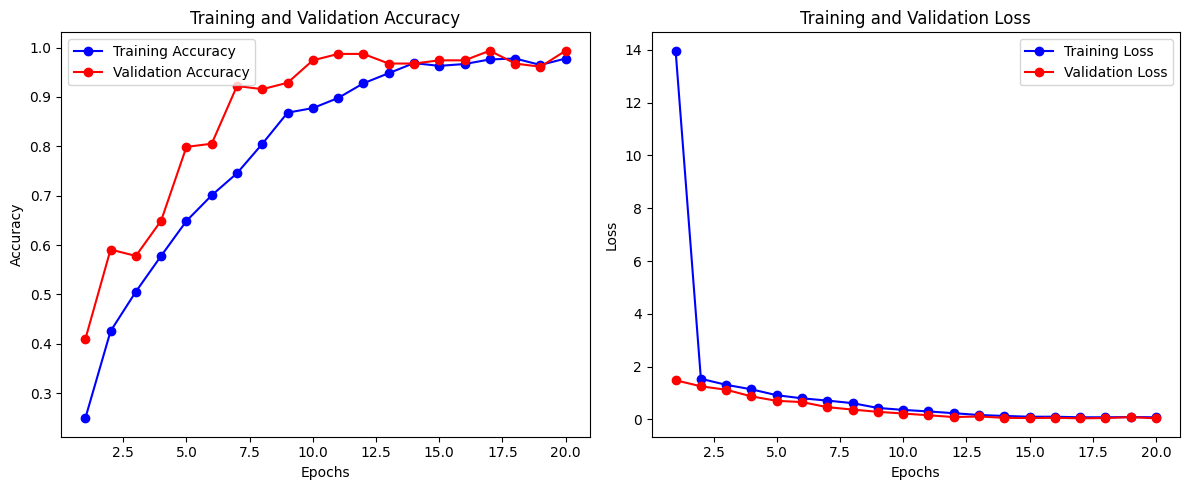

In [ ]:
import matplotlib.pyplot as plt

# Access the accuracy and loss values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation accuracy
epochs = range(1, len(training_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
results = model.evaluate(X_test, Y_test_one_hot)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.9896 - loss: 0.0315
Test Loss: 0.03899151459336281
Test Accuracy: 0.9870129823684692


In [ ]:
results = model.evaluate(X_test, Y_test_one_hot)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9896 - loss: 0.0315
Test Loss: 0.03899151459336281
Test Accuracy: 0.9870129823684692


# **Model Testing and Evaluation on Test Set**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Assuming you have 'Y_test' as your test labels
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test_one_hot, axis=1)

# Calculate metrics
accuracy = accuracy_score(Y_test_classes, Y_pred_classes)
precision = precision_score(Y_test_classes, Y_pred_classes, average='weighted')
recall = recall_score(Y_test_classes, Y_pred_classes, average='weighted')
f1 = f1_score(Y_test_classes, Y_pred_classes, average='weighted')

# Print metrics
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(Y_test_classes, Y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

# Count of each class
unique_labels, counts = np.unique(Y_test_classes, return_counts=True)
class_counts = dict(zip(unique_labels, counts))
print("\nClass Counts:")
print(class_counts)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 465ms/step
Test Accuracy: 0.987012987012987
Test Precision: 0.988193624557261
Test Recall: 0.987012987012987
Test F1 Score: 0.9870982875908983

Confusion Matrix:
[[21  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0 14  0  1]
 [ 0  0  0 19  0]
 [ 0  0  0  0 10]]

Class Counts:
{np.int64(0): np.int64(21), np.int64(1): np.int64(12), np.int64(2): np.int64(15), np.int64(3): np.int64(19), np.int64(4): np.int64(10)}


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


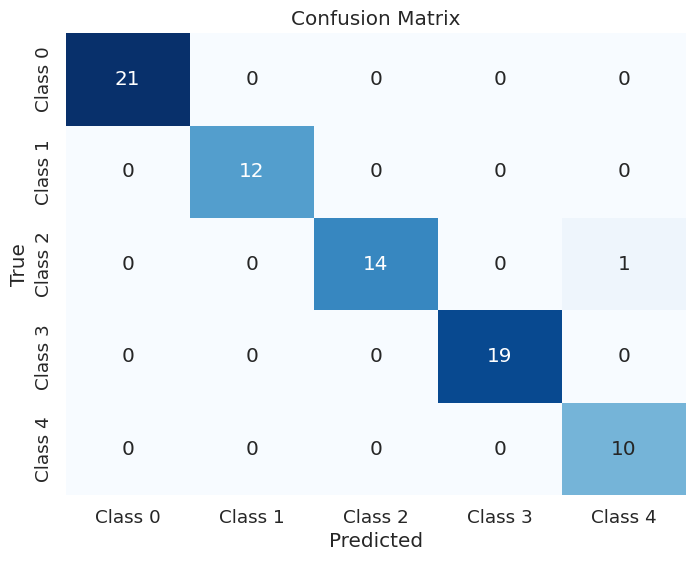

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have 'Y_test' as your test labels
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test_one_hot, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test_classes, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"],
            yticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()




In [ ]:
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

# Assuming you have 'Y_test' as your true labels
Y_test_classes = np.argmax(Y_test_one_hot, axis=1)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(Y_test_classes, Y_pred_classes)
print("Matthews Correlation Coefficient (MCC):", mcc)

# Calculate Cohen Kappa
kappa = cohen_kappa_score(Y_test_classes, Y_pred_classes)
print("Cohen Kappa:", kappa)

# Interpret Cohen Kappa
if kappa == 0:
    interpretation = "Poor agreement"
elif 0 < kappa <= 0.20:
    interpretation = "Weak agreement"
elif 0.20 < kappa <= 0.40:
    interpretation = "Fair agreement"
elif 0.40 < kappa <= 0.60:
    interpretation = "Moderate agreement"
elif 0.60 < kappa <= 0.80:
    interpretation = "Substantial agreement"
else:
    interpretation = "Almost perfect agreement"

print("Interpretation of Cohen Kappa:", interpretation)


Matthews Correlation Coefficient (MCC): 0.9836983457804289
Cohen Kappa: 0.9834870255200515
Interpretation of Cohen Kappa: Almost perfect agreement


# **Gradio App development**

In [ ]:
import gradio as gr
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Load model
model_path = "/content/drive/MyDrive/EyeSpy_Model/multi_model.keras"
model = tf.keras.models.load_model(model_path, compile=False)

# Class labels (in training order)
class_names = [
    "Healthy",
    "Bacterial Conjunctivitis",
    "Viral Conjunctivitis",
    "Allergic Conjunctivitis",
    "Uveitis"
]

# Prediction function with uncertainty handling
def predict_eye_condition(image):
    # Resize and normalize image
    image_resized = cv2.resize(image, (224, 224))
    image_resized = image_resized / 255.0
    image_input = np.expand_dims(image_resized, axis=0)

    # Predict
    preds = model.predict(image_input)[0]
    top_index = np.argmax(preds)
    confidence = preds[top_index] * 100
    top_class = class_names[top_index]

# Gradio UI
with gr.Blocks() as demo:
    # Hero Image
    gr.Image(value="/mnt/data/772808d7-64bd-4158-b734-2939b81359ba.png", show_label=False)

    # Title & Description
    gr.Markdown("""
    <div style="text-align:center;">
        <h1 style="margin-bottom: 0.3em;">EYESPY - AI Eye Diagnosis Tool</h1>
        <p>Upload a clear eye image to detect <strong>Conjunctivitis</strong>, <strong>Uveitis</strong>, or confirm if the eye is <strong>Healthy</strong>.</p>
    </div>
    """)

    # Upload & Prediction
    with gr.Row():
        image_input = gr.Image(type="numpy", label="📤 Upload Eye Image")
        with gr.Column():
            result_html = gr.HTML(label="Diagnosis Result")
            result_plot = gr.Plot(label="Prediction Confidence")

    # Button
    diagnose_btn = gr.Button("🔍 Diagnose")
    diagnose_btn.click(fn=predict_eye_condition, inputs=image_input, outputs=[result_html, result_plot])

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://740f13f77db29704fb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Task
Analyze the provided notebook to identify the reasons for wrong predictions and low confidence levels in the app, implement improved data splitting, data augmentation, and potentially transfer learning, retrain the model, and update the Gradio app with the improved model to fix the prediction issues.

## Analyze current data splitting and identify potential issues

### Subtask:
Review the current data splitting code to understand the ratios used and check for any obvious issues.


**Reasoning**:
Examine the code cell for data splitting and analyze the ratios and resulting dataset sizes.



In [ ]:
# Examine the data splitting code
print("Data splitting ratios: 70% Train, 20% Validation, 10% Test")
print("Train:", X_train.shape, Y_train.shape)
print("Val:  ", X_val.shape, Y_val.shape)
print("Test: ", X_test.shape, Y_test.shape)

# Total number of images
total_images = X_train.shape[0] + X_val.shape[0] + X_test.shape[0]
print(f"\nTotal number of images: {total_images}")

# Check if ratios are appropriate
print("\nAnalysis of splitting ratios:")
print(f"Train set size: {X_train.shape[0]} ({X_train.shape[0]/total_images:.2f} of total)")
print(f"Validation set size: {X_val.shape[0]} ({X_val.shape[0]/total_images:.2f} of total)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/total_images:.2f} of total)")

# Consider potential concerns
print("\nPotential concerns:")
if X_test.shape[0] < 100:
    print(f"- The test set size ({X_test.shape[0]}) is relatively small. This might lead to less reliable evaluation metrics.")

# Print class counts in test set for further analysis
unique_labels, counts = np.unique(Y_test, return_counts=True)
test_class_counts = dict(zip(unique_labels, counts))
print("\nClass distribution in Test set:")
print(test_class_counts)